<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [49]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [50]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)



#print(df.count())
df = df[["STATE","YEAR","ENROLL_ALL","ENROLL_8","AVG_MATH_8_SCORE","TOTAL_REVENUE","STATE_REVENUE","LOCAL_REVENUE", "FEDERAL_REVENUE","TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE"]]
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
#print(df.count())

#print(df[df.TOTAL_REVENUE.isna()][['STATE_REVENUE','LOCAL_REVENUE','FEDERAL_REVENUE']].notna().any())


df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
#print(df.count())

df['TOT_REV_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df['FED_REV_PER_STUDENT'] = df['FEDERAL_REVENUE'] / df['ENROLL_ALL']
df['STATE_REV_PER_STUDENT'] = df['STATE_REVENUE'] / df['ENROLL_ALL']
df['LOCAL_REV_PER_STUDENT'] = df['LOCAL_REVENUE'] / df['ENROLL_ALL']

dNew=df[['STATE','YEAR',"AVG_MATH_8_SCORE","TOT_REV_PER_STUDENT",'FED_REV_PER_STUDENT','STATE_REV_PER_STUDENT','LOCAL_REV_PER_STUDENT']]
dNew




,STATE,YEAR,AVG_MATH_8_SCORE,TOT_REV_PER_STUDENT,FED_REV_PER_STUDENT,STATE_REV_PER_STUDENT,LOCAL_REV_PER_STUDENT
0,ALABAMA,1992,252.0,3.661510,0.415750,2.267565,0.978194
2,ARIZONA,1992,265.0,4.837699,0.442314,2.033945,2.361441
3,ARKANSAS,1992,256.0,3.877685,0.404473,2.171703,1.301509
4,CALIFORNIA,1992,261.0,4.997299,0.394392,3.148812,1.454095
5,COLORADO,1992,272.0,5.199137,0.266477,2.135017,2.797643
...,...,...,...,...,...,...,...
1219,VIRGINIA,2015,288.0,12.354041,0.788573,4.861637,6.703831
1220,WASHINGTON,2015,287.0,12.611834,0.953444,7.629791,4.028599
1221,WEST_VIRGINIA,2015,271.0,12.536947,1.308187,7.134445,4.094315
1222,WISCONSIN,2015,289.0,13.410205,0.938448,6.763384,5.708373


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [152]:
print(dNew["YEAR"].unique())
len(dNew["YEAR"].unique())

[1992 2000 2003 2005 2007 2009 2011 2013 2015]


9

Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [52]:
dfMichigan=dNew.loc[dNew['STATE'] == "MICHIGAN"]
dfOhio=dNew.loc[dNew['STATE'] == "OHIO"]
dfMichigan=dfMichigan[["TOT_REV_PER_STUDENT",'FED_REV_PER_STUDENT','STATE_REV_PER_STUDENT','LOCAL_REV_PER_STUDENT']]
dfOhio=dfOhio[["TOT_REV_PER_STUDENT",'FED_REV_PER_STUDENT','STATE_REV_PER_STUDENT','LOCAL_REV_PER_STUDENT']]

print("Michigan","\n",dfMichigan.describe().loc['mean'])
print("Ohio","\n",dfOhio.describe().loc['mean'])

#Michigan has higher federal and state revenue per person, while Ohio has higher total and local revenue per person.

Michigan 
 TOT_REV_PER_STUDENT      10.834054
FED_REV_PER_STUDENT       0.938626
STATE_REV_PER_STUDENT     5.822766
LOCAL_REV_PER_STUDENT     4.072661
Name: mean, dtype: float64
Ohio 
 TOT_REV_PER_STUDENT      11.091645
FED_REV_PER_STUDENT       0.798348
STATE_REV_PER_STUDENT     4.666063
LOCAL_REV_PER_STUDENT     5.627234
Name: mean, dtype: float64


Find the average for your pedictor score across all states in 2019

In [67]:
#There is no data in my data set for 2019 because there is no revenue data for 2019. Hence, I will do 2015.
print("Means:")
dNew[dNew["YEAR"]==2015].describe().loc['mean']



Means:


YEAR                     2015.000000
AVG_MATH_8_SCORE          281.725490
TOT_REV_PER_STUDENT        13.414887
FED_REV_PER_STUDENT         1.117751
STATE_REV_PER_STUDENT       6.610767
LOCAL_REV_PER_STUDENT       5.686368
Name: mean, dtype: float64

Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [107]:
stateNames=dNew["STATE"].unique()
for i in stateNames:
    print(i," MAXIMUM \n",dNew[dNew["STATE"]==i].describe().loc['max'],"\n")

#dNew[dNew_.loc['ALABAMA']]

ALABAMA  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          269.000000
TOT_REV_PER_STUDENT         9.906684
FED_REV_PER_STUDENT         1.446467
STATE_REV_PER_STUDENT       5.556368
LOCAL_REV_PER_STUDENT       3.340755
Name: max, dtype: float64 

ARIZONA  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          283.000000
TOT_REV_PER_STUDENT         8.166879
FED_REV_PER_STUDENT         1.153191
STATE_REV_PER_STUDENT       3.866017
LOCAL_REV_PER_STUDENT       3.821900
Name: max, dtype: float64 

ARKANSAS  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          279.000000
TOT_REV_PER_STUDENT        10.786994
FED_REV_PER_STUDENT         1.711865
STATE_REV_PER_STUDENT       8.280539
LOCAL_REV_PER_STUDENT       1.431968
Name: max, dtype: float64 

CALIFORNIA  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          276.000000
TOT_REV_PER_STUDENT        12.566460
FED_REV_PER_STUDENT         1.588818
STATE_REV_PER_STUDENT 

RHODE_ISLAND  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          284.000000
TOT_REV_PER_STUDENT        16.667850
FED_REV_PER_STUDENT         1.638813
STATE_REV_PER_STUDENT       6.400517
LOCAL_REV_PER_STUDENT       8.966630
Name: max, dtype: float64 

SOUTH_CAROLINA  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          282.000000
TOT_REV_PER_STUDENT        11.472908
FED_REV_PER_STUDENT         1.432332
STATE_REV_PER_STUDENT       5.362919
LOCAL_REV_PER_STUDENT       5.014899
Name: max, dtype: float64 

TENNESSEE  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          278.000000
TOT_REV_PER_STUDENT         9.444256
FED_REV_PER_STUDENT         1.273216
STATE_REV_PER_STUDENT       4.379994
LOCAL_REV_PER_STUDENT       3.942873
Name: max, dtype: float64 

TEXAS  MAXIMUM 
 YEAR                     2015.000000
AVG_MATH_8_SCORE          290.000000
TOT_REV_PER_STUDENT        10.484254
FED_REV_PER_STUDENT         1.563468
STATE_REV_PER_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [108]:
#oops already did this!

# I did revenue_per_student on the total, federal, state, and local scale
dNew

,STATE,YEAR,AVG_MATH_8_SCORE,TOT_REV_PER_STUDENT,FED_REV_PER_STUDENT,STATE_REV_PER_STUDENT,LOCAL_REV_PER_STUDENT
0,ALABAMA,1992,252.0,3.661510,0.415750,2.267565,0.978194
2,ARIZONA,1992,265.0,4.837699,0.442314,2.033945,2.361441
3,ARKANSAS,1992,256.0,3.877685,0.404473,2.171703,1.301509
4,CALIFORNIA,1992,261.0,4.997299,0.394392,3.148812,1.454095
5,COLORADO,1992,272.0,5.199137,0.266477,2.135017,2.797643
...,...,...,...,...,...,...,...
1219,VIRGINIA,2015,288.0,12.354041,0.788573,4.861637,6.703831
1220,WASHINGTON,2015,287.0,12.611834,0.953444,7.629791,4.028599
1221,WEST_VIRGINIA,2015,271.0,12.536947,1.308187,7.134445,4.094315
1222,WISCONSIN,2015,289.0,13.410205,0.938448,6.763384,5.708373


Final feature list: Total revenue per student, federal revenue per student, state revenue per student, local revenue per student

Feature selection justification: **I believe the investment into education is really important to create the resources for students to thrive. However, there needs to be a focus on the capital and resources a state has to provide these resources. Therefore, seeing the revenue per students at the federal, state, local, and total scope will allow us to see which states are most resourced per student and have the highest potential to invest in students.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, '8th grade math score over total revenue per student')

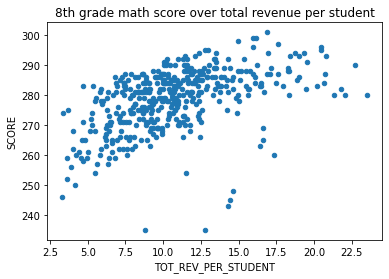

In [129]:
dNew.plot.scatter(x='TOT_REV_PER_STUDENT',y='AVG_MATH_8_SCORE')
#dNew.set_index('TOT_REV_PER_STUDENT').groupby('STATE').AVG_MATH_8_SCORE.plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over total revenue per student')



**<Measuring total revenue per student against 8th grade math score>**

**Visualization 2**

Text(0.5, 1.0, '8th grade math score over total revenue per student')

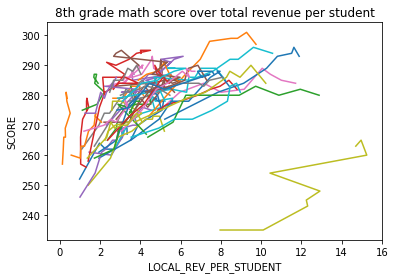

In [128]:
dNew.set_index('LOCAL_REV_PER_STUDENT').groupby('STATE').AVG_MATH_8_SCORE.plot()
plt.ylabel('SCORE')
plt.title('8th grade math score over total revenue per student')

**<Local revenue vs. score per state>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X = dNew[['FED_REV_PER_STUDENT','STATE_REV_PER_STUDENT','LOCAL_REV_PER_STUDENT']]
y = dNew.loc[X.index]["AVG_MATH_8_SCORE"]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION>**

In [134]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [147]:
# create your model here
model = LinearRegression()

In [150]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
print("R^2: ",model.score(X_test, y_test))
print("mean error: ",np.mean(model.predict(X_test)-y_test))
print("mean abs error: ",np.mean(np.abs(model.predict(X_test)-y_test)))
print("root mean error sq: ",np.mean((model.predict(X_test)-y_test)**2)**0.5)

268.1415052385799
[-3.52886872  1.72467201  1.16118014]
R^2:  0.30096529793463167
mean error:  0.682374197199437
mean abs error:  7.216338804657972
root mean error sq:  9.64729330805007


In [141]:
y_pred = model.predict(X_test)

In [139]:
# FOR CLASSIFICATION ONLY:
#from sklearn.metrics import plot_confusion_matrix
#
#plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

/Users/andrenandi/Desktop/mdst/mdst_tutorials_F21/env/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Math 8 score')

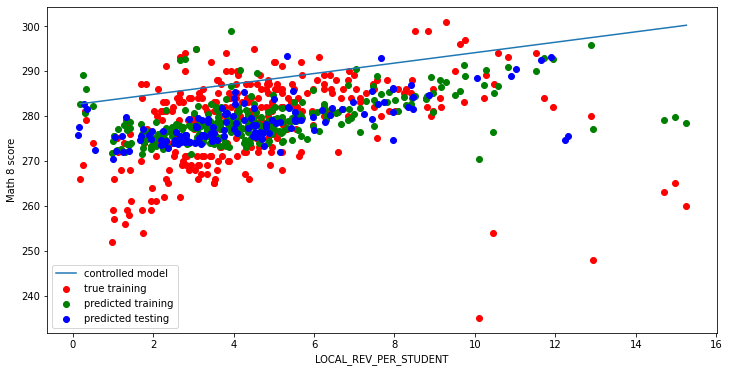

In [151]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "LOCAL_REV_PER_STUDENT"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Math 8 score")

<h2> Summary </h2>

**<
I believe this work shows a clear correlation bewteen revenue per student and mean 8th grade math test scores. Working our way from the top, we first come across a chart that measures total revenue per student against 8th grade math score in a scatter plot. Despite the spread of data being large, there is a clear upward slope in the points, with scores increasing with total revenue per student. The graph below, which measure local revenue per student against the score, shows similar trends  per state. While there are some outliers, most states have an upward sloping line and show a similar trend of increasing scores with increased local revenue per student. However, some concerns arise. Only 9 years of data were available and the dataset decreased drastically in size since there were many rows without 8th grade math data and revenue data. This means we trained our ML model on a very incomplete dataset. However, what is slightly reassuring is that we have almost frequent data for the last 20 year since the years we have data for are [1992 2000 2003 2005 2007 2009 2011 2013 2015]. 

Looking at the ML regression model, we had the following error calculations:
R^2:  0.30096529793463167
mean error:  0.682374197199437
mean abs error:  7.216338804657972
root mean error sq:  9.64729330805007

This R^2 is quite low, meaning we only see about 30% of the math 8 scores can be explained by the revenue per student variables. We have a standard deviation of residuals of 9.65, which is quite significant given the range of apporximately 60 for the data. The low mean error shows that the linear regression quite accurately minimized the sum of the error (with outliers on both sides of the linear regression), but the mean abs error reveals the while the sum of error was minimized, the individual residuals were significant and far from the linear regression line.

While the linear regression is quite inaccurate, the evidence above shows how revenue data is still an important factor, but not the sole factor when it comes to predicted 8th grade math test scores.
\>**